## Hypothesis: The yearly total precipitation correlates with soil moisture levels in Corpus Christi

## Null Hypothesis (H0): The yearly total precipitation does not correlate with soil moisture levels in Corpus Christi

    
**Data obtained from https://climate.northwestknowledge.net/NWTOOLBOX/formattedDownloads.php**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [11]:
#monthly soil moisture from 1958-2023
df = pd.read_csv("soilM_.precip_maxTemp_CorpusChristi.csv",header=0, parse_dates=True, skiprows= 10)
#precip_xr = xr.open_dataset("precip.mon.mean.nc")

In [13]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str), format='%Y%m')

In [14]:
df.set_index('Date', inplace=True)

In [15]:
df.head()

,Year,Month,soil(in),ppt(in),tmax(degF)
Date,,,,,
1958-01-01,1958,1,8.62,3.31,39.27
1958-02-01,1958,2,8.62,3.40,47.35
1958-03-01,1958,3,8.49,1.64,47.64
1958-04-01,1958,4,8.62,4.40,53.98
1958-05-01,1958,5,5.73,0.71,74.68


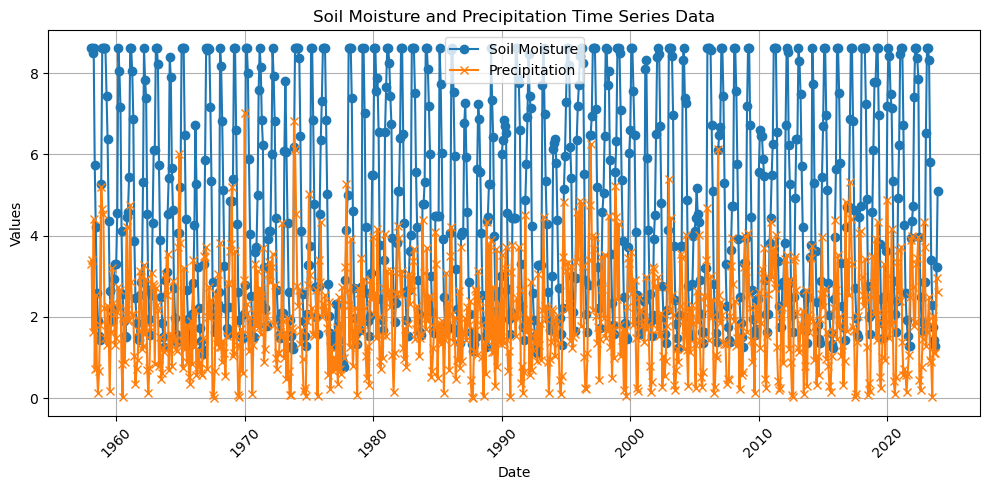

In [22]:
# Now plot the time series from the new DataFrame
plt.figure(figsize=(10, 5))

# Plot soil data
plt.plot(df.index, df['soil(in)'], marker='o', linestyle='-', label='Soil Moisture')

# Plot ppt data
plt.plot(df.index, df['ppt(in)'], marker='x', linestyle='-', label='Precipitation')

# Add title and labels
plt.title('Soil Moisture and Precipitation Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

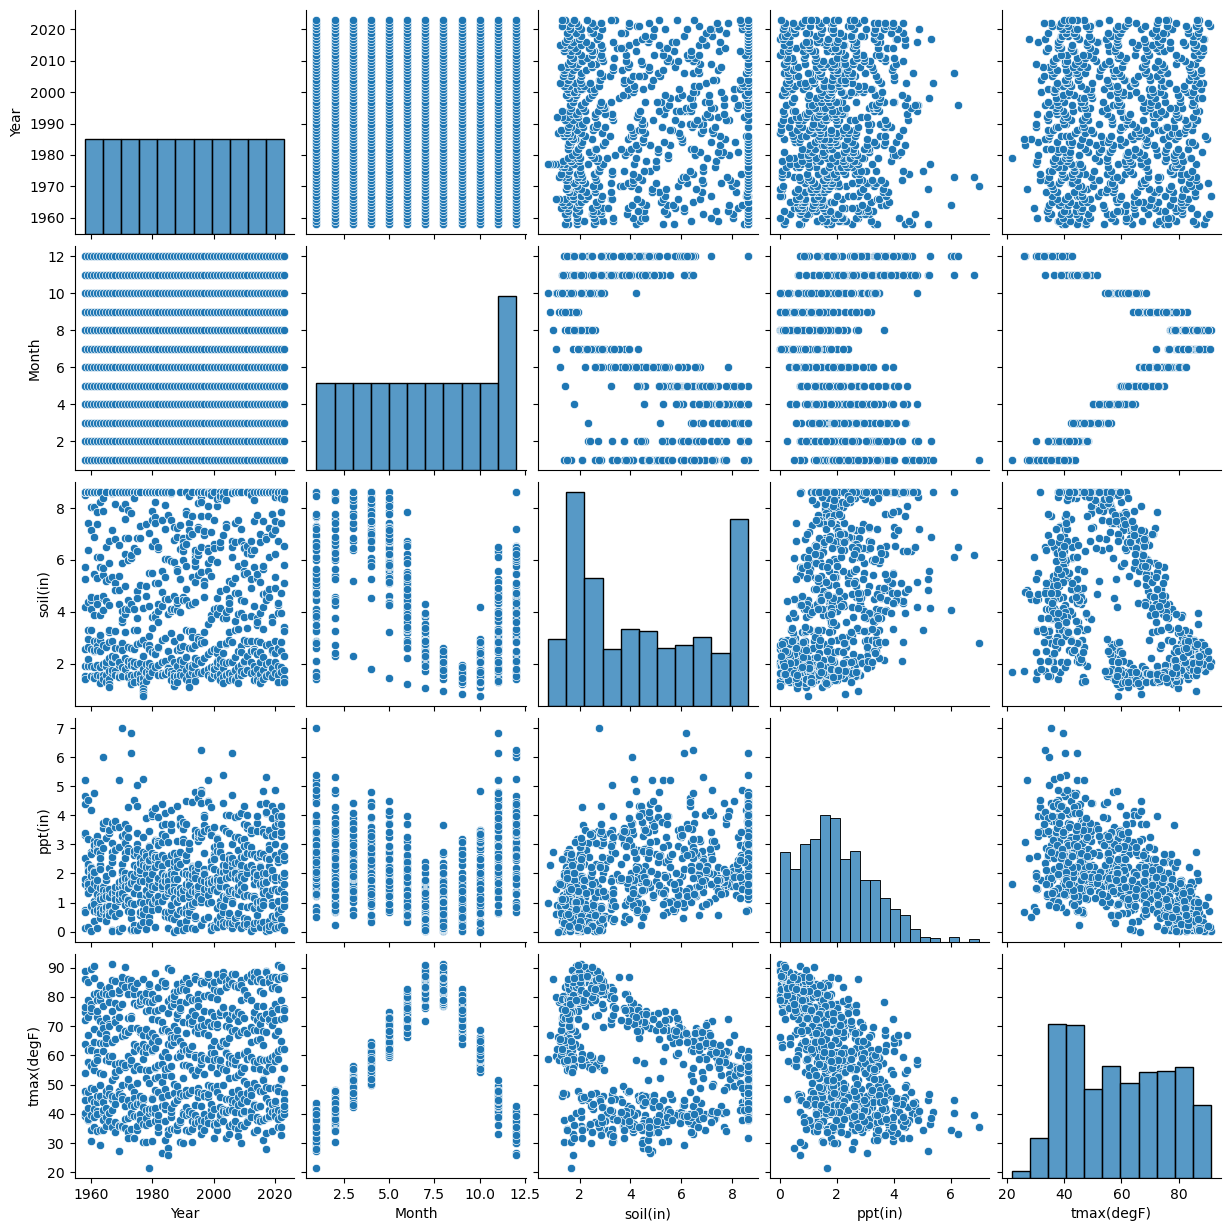

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
#calculating pearson's coeeficient between soilmoisture and precip.
r, p_val = pearsonr(df['soil(in)'], df['ppt(in)'])

In [6]:
print(f" Correlation : {r} , Pvalue: {p_val}")

 Correlation : 0.43518463449431755 , Pvalue: 6.21783894659575e-38


**Correlation (r): The Pearson's correlation coefficient is approximately  0.435.This suggests a moderate positive linear relationship between yearly total precipitation and soil moisture levels in Corpus Christi. This means as precipitation increases, soil moisture also tends to increase to some extent.**

**P-value: The p-value is approximately 6.22×10−38 , which is significantly small. This indicates that the probability of observing such a correlation by chance (if there were actually no correlation in the population from which the sample was drawn) is extremely low. We reject the null hypothesis**

In [7]:
# Assuming 'ppt' is your independent variable (predictor) and 'soil' is your dependent variable (response)
X = df['ppt(in)']  # Independent variable what im trying to predict
y = df['soil(in)']  # Dependent variable (response)

# Add a constant to the predictor variable set to represent the intercept
X = sm.add_constant(X)

# Create a model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Make predictions
df['predictions'] = results.predict(X)
# Print the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               soil(in)   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           6.22e-38
Time:                        05:08:43   Log-Likelihood:                -1795.0
No. Observations:                 792   AIC:                             3594.
Df Residuals:                     790   BIC:                             3603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7735      0.157     17.683      0.0

**The R-squared value is 0.189, which means that approximately 18.9% of the variability in soil moisture is explained by the model. This isn't very high, suggesting that precipitation alone does not fully explain the changes in soil moisture.**

**F-statistic and Prob (F-statistic): The F-statistic is 184.6 with a very small p-value (6.22×10−38), indicating that the model is statistically significant.**

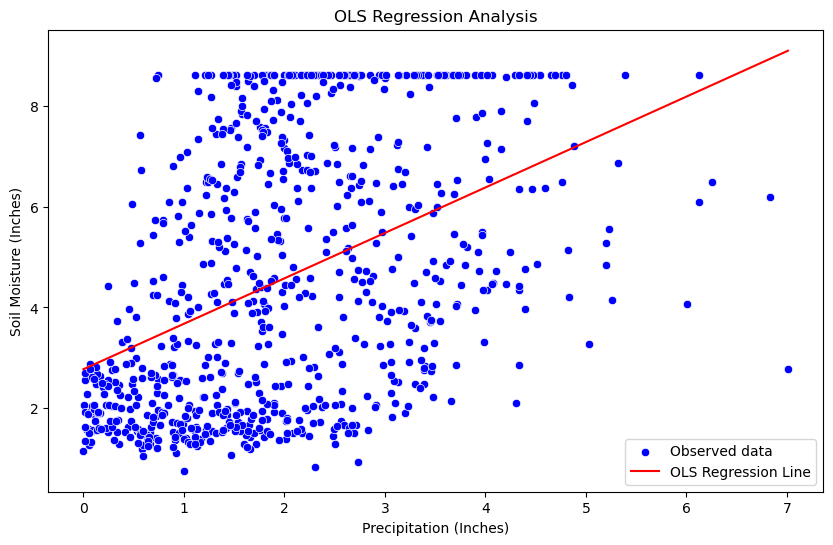

In [9]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of observed data
sns.scatterplot(x='ppt(in)', y='soil(in)', data=df, color='blue', label='Observed data')

# Line plot for the regression line
sns.lineplot(x='ppt(in)', y='predictions', data=df, color='red', label='OLS Regression Line')

plt.title('OLS Regression Analysis')
plt.xlabel('Precipitation (Inches)')
plt.ylabel('Soil Moisture (Inches)')
plt.legend()
plt.show()

**The positive slope of the regression line indicates that there is a positive relationship between precipitation and soil moisture; as precipitation increases, the soil moisture also tends to increase. The distribution of points suggests some variability around the regression line, which is expected in real-world data.**